In [1]:
!pip3 install pyensembl
!pyensembl install --release 99 --species mus_musculus


  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
^C
Operation cancelled by user
2020-05-19 12:08:08,460 - pyensembl.shell - INFO - Running 'install' for EnsemblRelease(release=99, species='mus_musculus')
2020-05-19 12:08:08,839 - pyensembl.sequence_data - INFO - Loaded sequence dictionary from /home/siddarth/.cache/pyensembl/GRCm38/ensembl99/Mus_musculus.GRCm38.cdna.all.fa.gz.pickle
2020-05-19 12:08:08,887 - pyensembl.sequence_data - INFO - Loaded sequence dictionary from /home/siddarth/.cache/pyensembl/GRCm38/ensembl99/Mus_musculus.GRCm38.ncrna.fa.gz.pickle
2020-05-19 12:08:08,981 - pyensembl.sequence_data - INFO - Loaded sequence dictionary from /home/siddarth/.cache/pyensembl/GRCm38/ensembl99/Mus_musculus.GRCm38.pep.all.fa.gz.pickle


In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from pyensembl import EnsemblRelease

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# dataFilePath = "/content/drive/My Drive/ScRNA_data/GSE109262_ESC_RNA_counts.txt"
#dataFilePath = "../data/GSE109262_ESC_RNA_counts.txt"
dataFilePath = "../data/removed_zero_expression_genes.csv"

In [4]:
#df = pd.read_csv(dataFilePath,sep='\t')
df = pd.read_csv(dataFilePath,sep=',')

In [5]:
df.head(20)

,ESC_ens_id,ESC_A01,ESC_A02,ESC_A03,ESC_A04,ESC_A05,ESC_A06,ESC_A07,ESC_A08,ESC_A09,...,ESC_H01,ESC_H02,ESC_H03,ESC_H04,ESC_H05,ESC_H06,ESC_H07,ESC_H08,ESC_H09,ESC_H10
0,ENSMUSG00000025902,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ENSMUSG00000033845,0,653,246,297,464,277,548,346,838,...,0,130,703,407,1069,1081,240,494,619,368
2,ENSMUSG00000025903,0,481,261,181,118,320,352,280,560,...,0,113,255,171,767,125,213,157,690,132
3,ENSMUSG00000033813,0,513,670,269,180,103,171,233,72,...,0,108,244,310,505,921,74,605,324,84
4,ENSMUSG00000002459,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,ENSMUSG00000033793,0,405,941,190,148,157,231,326,141,...,0,110,139,0,654,1350,60,452,813,198
6,ENSMUSG00000025905,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,ENSMUSG00000025907,0,469,166,66,64,0,0,51,126,...,0,28,47,131,0,751,29,162,56,54
8,ENSMUSG00000087247,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,ENSMUSG00000051285,0,36,219,78,1,2,0,25,73,...,0,24,14,64,50,382,16,23,13,29


In [6]:
df_ids = df['ESC_ens_id']

In [7]:
df_ids.head(20)

0     ENSMUSG00000025902
1     ENSMUSG00000033845
2     ENSMUSG00000025903
3     ENSMUSG00000033813
4     ENSMUSG00000002459
5     ENSMUSG00000033793
6     ENSMUSG00000025905
7     ENSMUSG00000025907
8     ENSMUSG00000087247
9     ENSMUSG00000051285
10    ENSMUSG00000025909
11    ENSMUSG00000061024
12    ENSMUSG00000025911
13    ENSMUSG00000025912
14    ENSMUSG00000045210
15    ENSMUSG00000025915
16    ENSMUSG00000046101
17    ENSMUSG00000099032
18    ENSMUSG00000025916
19    ENSMUSG00000025917
Name: ESC_ens_id, dtype: object

In [8]:
ensembl = EnsemblRelease(species="mouse")

In [9]:
def rpkm(counts, lengths):
    """Calculate reads per kilobase transcript per million reads.

    RPKM = (10^9 * C) / (N * L)

    Where:
    C = Number of reads mapped to a gene
    N = Total mapped reads in the experiment
    L = Exon length in base pairs for a gene

    Parameters
    ----------
    counts: array, shape (N_genes, N_samples)
        RNAseq (or similar) count data where columns are individual samples
        and rows are genes.
    lengths: array, shape (N_genes,)
        Gene lengths in base pairs in the same order
        as the rows in counts.

    Returns
    -------
    normed : array, shape (N_genes, N_samples)
        The RPKM normalized counts matrix.
    """
    N = np.sum(counts, axis=0)  # sum each column to get total reads per sample
    L = lengths
    C = counts

    normed = 1e9 * C / (N[np.newaxis, :] * L[:, np.newaxis])

    return(normed)


In [10]:
gene = ensembl.gene_by_id('ENSMUSG00000025900')

In [11]:
tr_lengths = []
for i in df_ids:
  try:
    gene = ensembl.gene_by_id(i)
    start = gene.start
    end = gene.end
  except ValueError:
    start = 0
    end = 10000
  tr_lengths.append(end-start)

In [12]:
tr_lengths = np.asarray(tr_lengths)

In [13]:
df = df.drop('ESC_ens_id',axis=1)
data = df.to_numpy()

In [14]:
norm_data = rpkm(data,tr_lengths)

In [15]:
norm_data.shape

(15760, 80)

# Filtering out cells and Genes

In [16]:
from sklearn.feature_selection import VarianceThreshold

## Cells

In [17]:
rem_cells = VarianceThreshold(threshold=(5000))
norm_data = rem_cells.fit_transform(norm_data)
norm_data.shape

(15760, 66)

## Genes

In [18]:
norm_data = norm_data.T

In [19]:
select = VarianceThreshold(threshold=(250000))
norm_data = select.fit_transform(norm_data)

In [20]:
norm_data.shape

(66, 27)

In [21]:
norm_data

array([[   0.        ,    0.        , 6601.59256819, ...,    0.        ,
           0.        ,    0.        ],
       [  19.85616615,   93.24527651,   13.97578371, ..., 1190.35761577,
         143.85498497, 2475.40108205],
       [  40.32270547,   47.54711823,   27.71399056, ..., 1327.94405835,
         242.04265118, 1500.03974283],
       ...,
       [  31.52234447,   62.89369218,   32.60135866, ..., 2172.61766957,
         302.52235667, 1596.82481547],
       [  36.3820489 ,   55.12159375,   18.22006938, ..., 1528.19970536,
         221.93977215, 1049.46492167],
       [  49.99596788,   43.36032756,   45.7055923 , ..., 1160.0190096 ,
         135.07400911,  962.07490844]])

In [22]:
model = KMeans(n_clusters=4)

In [23]:
model.fit(norm_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
labels = model.predict(norm_data)

In [25]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0]


In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
plot_data = pca.fit_transform(norm_data)

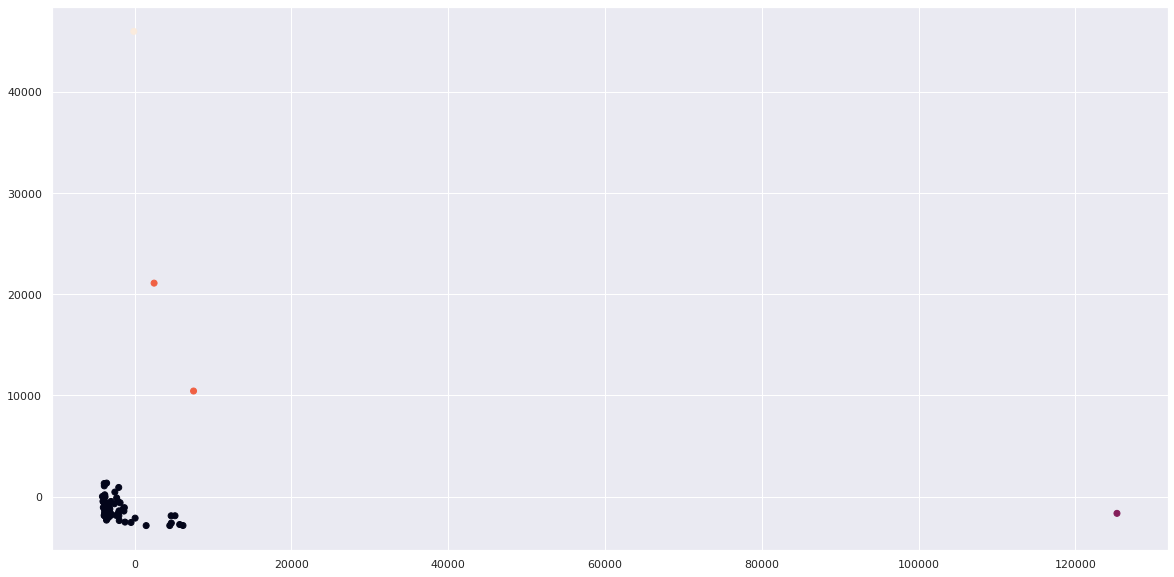

In [27]:
plt.figure(figsize=(20,10))
plt.scatter(plot_data[:,0],plot_data[:,1],c = labels)

# Genes with Highest Variance

In [28]:
indices = select.get_support(indices=True)
genes = []
for i in indices:
  genes.append(df_ids[i])

In [36]:
genes

['ENSMUSG00000061024',
 'ENSMUSG00000068882',
 'ENSMUSG00000075014',
 'ENSMUSG00000090733',
 'ENSMUSG00000037894',
 'ENSMUSG00000029580',
 'ENSMUSG00000025492',
 'ENSMUSG00000033307',
 'ENSMUSG00000093674',
 'ENSMUSG00000031762',
 'ENSMUSG00000031765',
 'ENSMUSG00000060143',
 'ENSMUSG00000060461',
 'ENSMUSG00000019132',
 'ENSMUSG00000021520',
 'ENSMUSG00000021270',
 'ENSMUSG00000073640',
 'ENSMUSG00000064341',
 'ENSMUSG00000064345',
 'ENSMUSG00000064351',
 'ENSMUSG00000064354',
 'ENSMUSG00000064357',
 'ENSMUSG00000064358',
 'ENSMUSG00000064363',
 'ENSMUSG00000064367',
 'ENSMUSG00000064368',
 'ENSMUSG00000064370']

In [40]:
gene_names = []
for gene in genes:
    gene_names.append(ensembl.gene_name_of_gene_id(gene))

gene_names

['Rrs1',
 'Ssb',
 'Gm10800',
 'Rps27',
 'H2az1',
 'Actb',
 'Ifitm3',
 'Mif',
 'Rpl41',
 'Mt2',
 'Mt1',
 'Gm10076',
 'Dppa5a',
 'BC005537',
 'Uqcrb',
 'Hsp90aa1',
 'Rpl27-ps3',
 'mt-Nd1',
 'mt-Nd2',
 'mt-Co1',
 'mt-Co2',
 'mt-Atp6',
 'mt-Co3',
 'mt-Nd4',
 'mt-Nd5',
 'mt-Nd6',
 'mt-Cytb']

# TSNE

In [29]:
from sklearn.manifold import TSNE

In [30]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(norm_data)

[t-SNE] Computing 65 nearest neighbors...
[t-SNE] Indexed 66 samples in 0.000s...
[t-SNE] Computed neighbors for 66 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 66 / 66
[t-SNE] Mean sigma: 1771.582414
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.865757
[t-SNE] KL divergence after 300 iterations: 0.837238


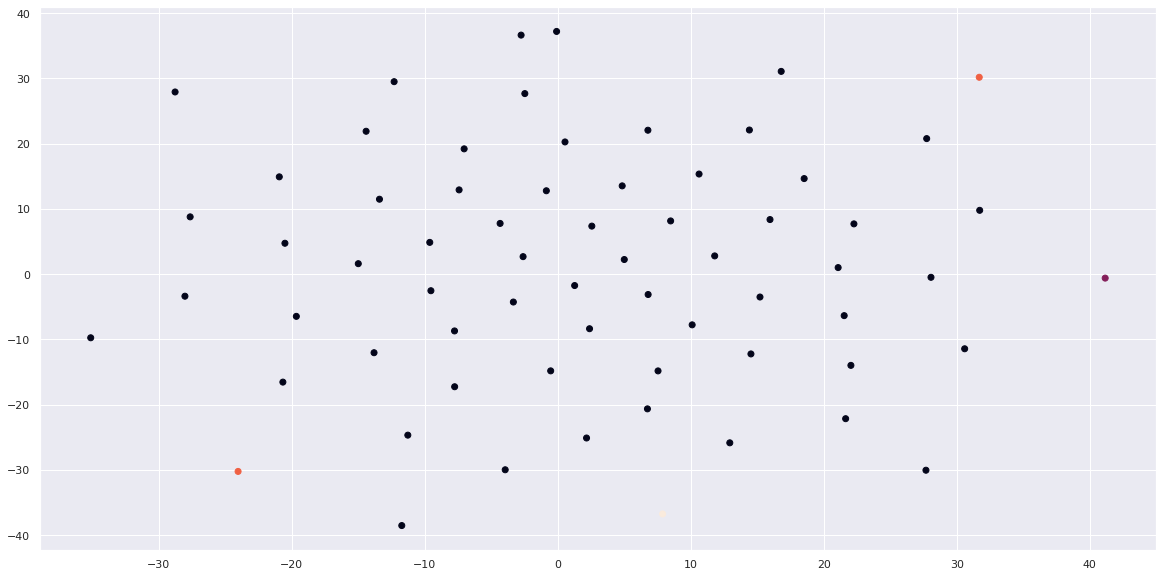

In [31]:
plt.figure(figsize=(20,10))
plt.scatter(tsne_results[:,0],tsne_results[:,1],c = labels)

In [32]:
name_cells_unformatted = df.T.columns.values
name_cells_unformatted

array([    0,     1,     2, ..., 15757, 15758, 15759])

In [33]:
name_cells = name_cells_unformatted[1:]
name_cells

array([    1,     2,     3, ..., 15757, 15758, 15759])

In [34]:
labelled_cluster = dict(zip(name_cells, labels))

# The Final Clusters

In [35]:
i = 0
for i in range(4):
    print("Cluster " + str(i) + ":")
    for cell, cluster in labelled_cluster.items():
        if cluster == i:
            print(cell)
    i += 1

Cluster 0:
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
32
33
34
35
36
37
38
39
40
41
42
44
45
46
47
48
49
50
51
52
54
55
56
57
58
59
61
62
63
64
65
66
Cluster 1:
43
Cluster 2:
53
60
Cluster 3:
31
